In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/nicolelpepper/eds220-hwk2.git


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

*****SPECIAL NOTE FROM NICOLE:*
*I was having trouble committing sucessfully with this assignment. I went to Annie's office hours and she was able to help me figure it out. Since I had already completed task 2 and 3, I was not able to commit meanginfully along the way. I have since made extra commits but just wanted to point out why I don't have great commits and commit messages throughout the assignment.*

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

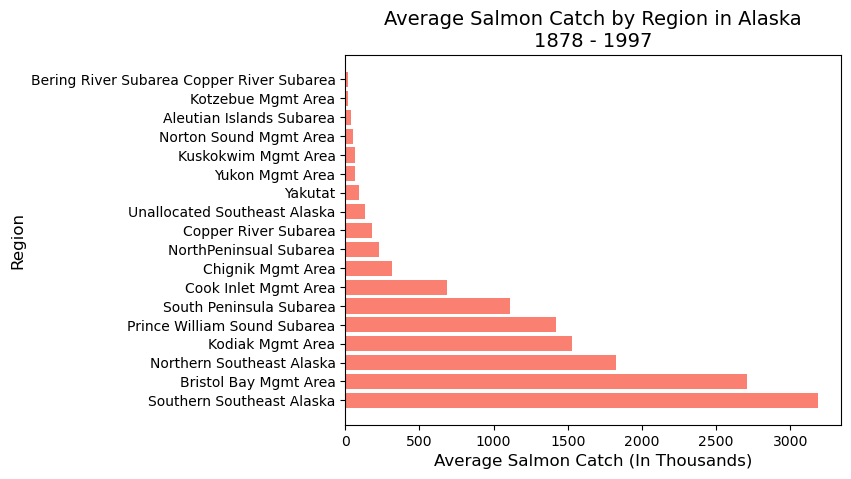

In [6]:
# FINAL CODE

# Import libraries
import pandas as pd 
import matplotlib.pyplot as plt

# Read in Salmon Data
catch_data = pd.read_csv('data/salmon_data.csv')

# Remove the notes column
catch_data = catch_data.drop(columns =['notesRegCode'])

# Find the row with observation containing "I" in the Catch Column
catch_I = catch_data.loc[ catch_data['Catch'] == 'I',['Region','Year','Species','Catch']]

# Reassign the value from "I" to 1 in the Catch Column
catch_data.loc[400, 'Catch'] = 1

# Update the catch column to be type int 64
catch_data['Catch'] = pd.to_numeric(catch_data['Catch'])

# Calculate the average catch by region 
avg_region = catch_data.groupby('Region')['Catch'].mean()

# Create dictionary that translates region abbreviations to full region names
region_names = {
    'GSE': 'Unallocated Southeast Alaska',
    'NSE': 'Northern Southeast Alaska',
    'SSE': 'Southern Southeast Alaska',
    'YAK': 'Yakutat',
    'PWSmgmt':'Prince William Sound Mgmt Area',
    'BER': 'Bering River Subarea Copper River Subarea',
    'COP': 'Copper River Subarea',
    'PWS': 'Prince William Sound Subarea',
    'CKI': 'Cook Inlet Mgmt Area',
    'BRB': 'Bristol Bay Mgmt Area',
    'KSK': 'Kuskokwim Mgmt Area',
    'YUK': 'Yukon Mgmt Area',
    'NRS': 'Norton Sound Mgmt Area',
    'KTZ': 'Kotzebue Mgmt Area',
    'KOD': 'Kodiak Mgmt Area',
    'CHG': 'Chignik Mgmt Area',
    'ALUmgmt': 'Alaska Peninsula - Aleutian Islands Mgmt Area',
    'SOP': 'South Peninsula Subarea',
    'ALU': 'Aleutian Islands Subarea',
    'NOP': 'NorthPeninsual Subarea'
    
}

# Apply the region dictionary to the avg_region data
avg_region_df = pd.DataFrame(avg_region)
avg_region_df['Region_Full'] = avg_region_df.index.map(region_names)

# Sort avg_region_df in descending order
avg_region_df = avg_region_df.sort_values(by='Catch', ascending=False)
avg_region_df

# Create a bar plot of estimated average salmon catches by region
plt.barh(avg_region_df['Region_Full'], avg_region_df['Catch'], color='salmon')

# Customize the graph
plt.title('Average Salmon Catch by Region in Alaska\n1878 - 1997', fontsize=14)
plt.ylabel('Region', fontsize=12)
plt.xlabel('Average Salmon Catch (In Thousands)', fontsize=12)
plt.show()

## 1

a. Use this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [ ]:
# a.

# Import libraries
import pandas as pd 
import matplotlib.pyplot as plt

# Read in Salmon Data
catch_data = pd.read_csv('data/salmon_data.csv')

# Check out the head of the Salmon Data
catch_data.head()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [ ]:
# b.
# Explore the salmon catch data

# Explore data types
print(catch_data.dtypes)

# Explore the `species` and `region` columns
print("The unique species in the catch data are:",list(catch_data['Species'].unique()))
print("The unique regions in the catch data are:",list(catch_data['Region'].unique()))

# Explore date range
print("Max Year =", catch_data['Year'].max())
print("Min Year =", catch_data['Year'].min())

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

*ANSWER:* 

- I used `dtypes` to check out the data types for the different columns.
- I used `max` and `min` to find the max and min year.
- I used `unique` the find the unique values for the 'Species' and 'Region' columns.

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [ ]:
# Inspect the notes column
notes_unique = catch_data['notesRegCode'].unique()
notes_unique

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [ ]:
# Remove the notes column
catch_data = catch_data.drop(columns =['notesRegCode'])
catch_data

<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


The region, year, and species are as expected but the catch column should be a numeric (integer) value instead of an object.

In [ ]:
# Examine the column types in catch data
print(catch_data.dtypes)

<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [ ]:
# Set catch column to numeric/integer type
# Note: this fails because on of the observations is a string 'I'
catch_data['Catch'].astype('int64')"

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. 

In [ ]:
# Find the row with observation containing "I" in the Catch Column
catch_I = catch_data.loc[ catch_data['Catch'] == 'I',['Region','Year','Species','Catch']]
catch_I

## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

In [ ]:
# part 1
# Reassign the value from "I" to 1 in the Catch Column
catch_data.loc[400, 'Catch'] = 1

# part 2
# Access the updated row to confirm the "I" value was updated to 1
catch_1 = catch_data.iloc[400]
catch_1

## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [ ]:
# Update the catch column to be type int 64
catch_data['Catch'] = pd.to_numeric(catch_data['Catch'])

# Use dtypes to confirm that the Catch column type was updated to numeric
catch_column_type = catch_data['Catch'].dtypes
catch_column_type  

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [ ]:
# Calculate the average catch by region 
avg_region = catch_data.groupby('Region')['Catch'].mean()
avg_region

<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

In [2]:
# Create dictionary that translates region abbreviations to full region names
region_names = {
    'GSE': 'Unallocated Southeast Alaska',
    'NSE': 'Northern Southeast Alaska',
    'SSE': 'Southern Southeast Alaska',
    'YAK': 'Yakutat',
    'PWSmgmt':'Prince William Sound Mgmt Area',
    'BER': 'Bering River Subarea Copper River Subarea',
    'COP': 'Copper River Subarea',
    'PWS': 'Prince William Sound Subarea',
    'CKI': 'Cook Inlet Mgmt Area',
    'BRB': 'Bristol Bay Mgmt Area',
    'KSK': 'Kuskokwim Mgmt Area',
    'YUK': 'Yukon Mgmt Area',
    'NRS': 'Norton Sound Mgmt Area',
    'KTZ': 'Kotzebue Mgmt Area',
    'KOD': 'Kodiak Mgmt Area',
    'CHG': 'Chignik Mgmt Area',
    'ALUmgmt': 'Alaska Peninsula - Aleutian Islands Mgmt Area',
    'SOP': 'South Peninsula Subarea',
    'ALU': 'Aleutian Islands Subarea',
    'NOP': 'NorthPeninsual Subarea'
    
}

# Apply the region dictionary to the avg_region data
avg_region_df = pd.DataFrame(avg_region)
avg_region_df['Region_Full'] = avg_region_df.index.map(region_names)

# Sort avg_region_df in descending order
avg_region_df = avg_region_df.sort_values(by='Catch', ascending=False)
avg_region_df

,Catch,Region_Full
Region,,
SSE,3184.660714,Southern Southeast Alaska
BRB,2709.796491,Bristol Bay Mgmt Area
NSE,1825.020870,Northern Southeast Alaska
KOD,1528.350000,Kodiak Mgmt Area
PWS,1419.236697,Prince William Sound Subarea
SOP,1110.942222,South Peninsula Subarea
CKI,683.571429,Cook Inlet Mgmt Area
CHG,315.487273,Chignik Mgmt Area
NOP,229.493478,NorthPeninsual Subarea


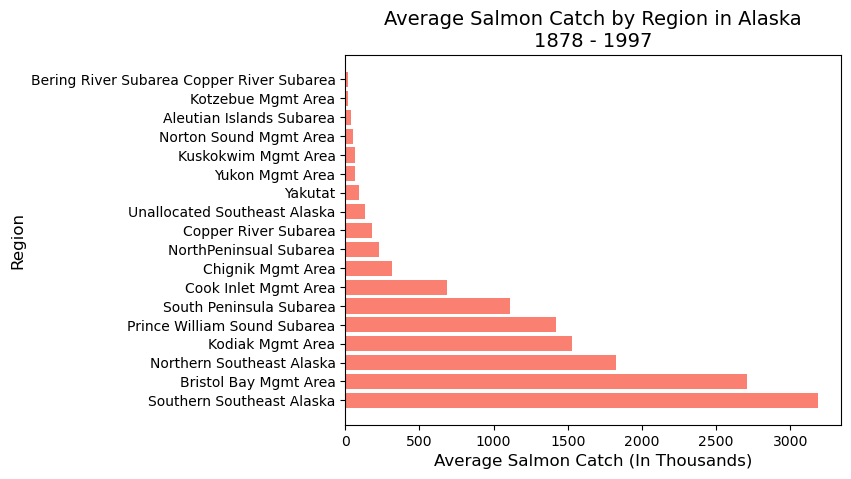

In [5]:
# Create a bar plot of estimated average salmon catches by region
plt.barh(avg_region_df['Region_Full'], avg_region_df['Catch'], color='salmon')
# Customize the graph
plt.title('Average Salmon Catch by Region in Alaska\n1878 - 1997', fontsize=14)
plt.ylabel('Region', fontsize=12)
plt.xlabel('Average Salmon Catch (In Thousands)', fontsize=12)
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

*ANSWER:* 
This figure shows the average salmon catch, measured in thousands of fish, displayed on the x-axis by region, shown on the y-axis. The Southern Southeast Alaska and Bristol Bay Management Areas emerge as the top producing regions. While the Bering River Subarea Copper River Subarea and Kotzebue Management Areas stand out as the lowest catch regions. It's important to note that this graph does not normalize by the regions' size, meaning that factors such as the size of the region could influence the average catch values, among other factors.


## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).